## Branched continuation of quantitative validation attempts from doc2vec-analysis.ipynb

In [36]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

label_encoder = pickle.load( open('label-encoder.pkl','rb') )
label_decoder = pickle.load( open('label-decoder.pkl','rb') )

def into_ranked_dataframe(sim):
    """ Takes the output of doc2vec most_similar and puts it into
    a dataframe thats nice to work with """
    tmp = pd.DataFrame(sim,columns = ['product_label','sim_score'])
    tmp['rank'] = tmp.index
    tmp['name'] = tmp['product_label'].apply(lambda r: label_decoder[r])
    
    return tmp[['name','rank']].set_index('name')

full_data = pd.read_csv('../data/CatfoodReviewsInfo.csv')

In [44]:
mean_ratings = full_data[['product','rating']].groupby('product').mean()

In [47]:
# catwagn is also a good display
user = 'CarolinaCat'

pd.set_option('display.max_colwidth',200)
data = pd.read_csv('prepared_data.csv')

mean_product_ratings = data[['product','rating']].groupby('product').mean()

data = data.join(mean_ratings,how='left',rsuffix='_mean',on='product')

data[data['review_author']==user][['product','rating','product_label']];

In [3]:
author_count = data.groupby('review_author')['review_author'].count()
authorgroup = author_count[(author_count > 5) & (author_count < 15)]
authorgroup.sample(5)

review_author
Becca            10
Carrie            7
Opps              7
Tiffany           9
KittyCatMommy     9
Name: review_author, dtype: int64

In [48]:
dbow_model = Doc2Vec.load('catfood-d2v-dbow.model')

In [49]:
userdata = data[data['review_author']==user]

In [50]:
low_rankings = userdata[userdata['rating'] <= 3].sort_values(by='rating',ascending=True)
high_rankings = userdata[userdata['rating'] >= 4].sort_values(by='rating',ascending=False)

In [51]:
negatives = [val for val in low_rankings.head(2)['product_label']]
positives = [val for val in high_rankings.head(2)['product_label']]

In [52]:
negatives;

In [53]:
positives;

In [54]:
sims = dbow_model.docvecs.most_similar(positive=positives,negative=negatives,topn=500)

In [55]:
decoded = [(label_decoder[label],similarity) for (label,similarity) in sims]
results = pd.DataFrame(decoded,columns=['product','sim_score']).set_index('product')

In [56]:
tmp = userdata[['product','rating','product_label','rating_mean']].set_index('product')
val = tmp.join(results,how='left')

In [64]:
val.dropna(axis=0,inplace=True)

In [65]:
print(negatives,positives)

[88, 434] [242, 30]


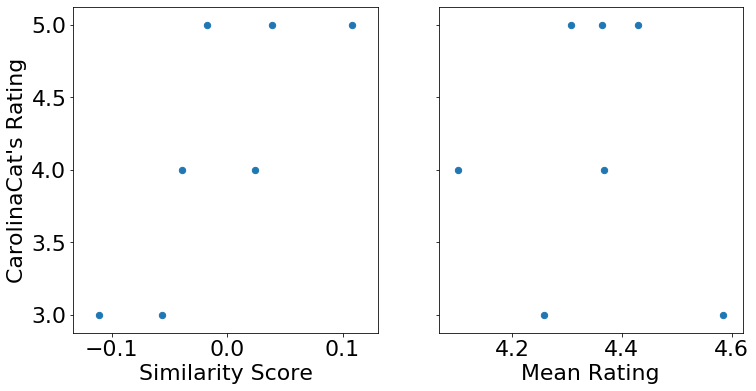

In [71]:
import matplotlib
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6),sharey='all')

ax = axes[0]
ax.scatter(x=val['sim_score'],y=val['rating'],s=40)
ax.set_xlabel('Similarity Score')
ax.set_ylabel("CarolinaCat's Rating")

ax = axes[1]
ax.scatter(x=val['rating_mean'],y=val['rating'],s=40)
ax.set_xlabel('Mean Rating')
# ax.set_ylabel("CarolinaCat's Rating")

matplotlib.rcParams.update({'font.size': 22, 'font.weight': 'regular'})
plt.show()


In [373]:
negatives = [157, 244]
positives = [224, 120]